# Analysis of Car Data


## Information About Dataset

Data set imported from kaggle [Kaggle - US Cars Dataset](https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset). Data scraped from Auction Export contains new and used vehicle data from 2019. 

## Data Cleaning and Preparation

In [101]:
__author__ = "Neal Kapur"
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
FILE_PATH: str = "../data/cars_data.csv"
df = pd.read_csv(FILE_PATH)

In [34]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [35]:
df = df.drop(["vin", "lot"], axis = 1).drop(df.columns[[0]], axis = 1)
df = df.rename(columns = {'condition': 'time_left'} )
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,time_left
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [36]:
# Remove whitespace - necessary in better classifying the columns.
def remove_whitespace(df):
    """Automatically trim the columns of a dataframe."""
    for i in df.columns:
        if df[i].dtype == "object":
            df[i] = df[i].map(str.strip)
    return df 

In [37]:
df = remove_whitespace(df)
len(df[df["country"] != "usa"])
df.title_status.unique() # Only has Clean Vehicle or Salvage Title vehicles in dataset

array(['clean vehicle', 'salvage insurance'], dtype=object)

Generalized Notes
- 7 transactions occured outside of the United States (Canada).
- 163 transactions that do not have a clean title / salvaged title. 

In [38]:
title_breakdown = df.title_status.value_counts()

### EDA 

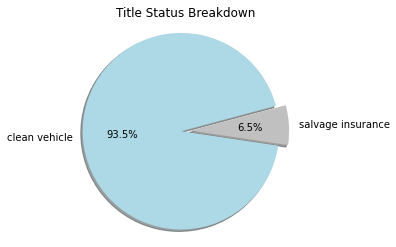

In [39]:
my_colors = ['lightblue', 'silver']
my_explode = (0, 0.1)
plt.pie(title_breakdown, labels = title_breakdown.index, autopct='%1.1f%%', startangle=15, shadow = True, colors = my_colors, explode=my_explode)
plt.title('Title Status Breakdown')
plt.axis('equal')
plt.show()

In [40]:
car_years = df.year.value_counts()
# Group the years into five year marks 
# Create a barchart of these five year 
years = [] 
for i in car_years.index:
    years.append(i)

#### Distribution of Car Ages


I grouped the data into five year periods and aggregated the number of cars on sale during that period of time.

In [41]:
# Start at 2020 iterate down 
def groupby_years(df, period_length = 5):
    """Create a barchart of five year marks """
    years = [] 
    for i in df.index:
        years.append(i)
    years.sort()
    start = max(years)
    result = {}
    sval = 0 
    n = period_length 
    i = 0 
    while i < len(years):
        if n == 0:
            result[f"{start}:{start + 5}"] = sval
            sval = 0 
            n = 5
        else:
            try: 
                sval += df[start]
                i += 1 
            except:
                sval += 0
            n -= 1
            start -= 1
    return result
    

In [42]:
result = groupby_years(car_years)
result

{'2015:2020': 1915,
 '2010:2015': 481,
 '2005:2010': 56,
 '2000:2005': 28,
 '1995:2000': 13,
 '1990:1995': 4,
 '1985:1990': 0,
 '1980:1985': 1,
 '1975:1980': 0}

Text(0, 0.5, 'Number of Cars')

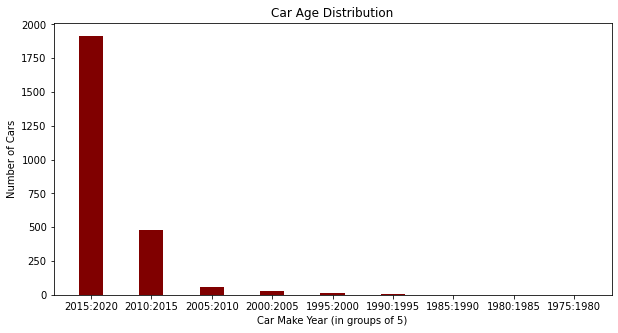

In [43]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x = result.keys(), height = result.values(), color = "maroon", width = 0.4)
plt.title("Car Age Distribution")
plt.xlabel("Car Make Year (in groups of 5)")
plt.ylabel("Number of Cars")

The majority of cars being sold are within the 10 year range. This suggests that at this given time on this platform the majority of used cars sales were in the last 10 years.

#### Popular Sales Regions (in the United States)

In [44]:
df.state = df.state.str.title()
state_data = pd.DataFrame(df.state.value_counts()).rename(columns = {"state": "occurence"}).sort_index()
state_data = state_data.drop("Ontario") # Ontario is a Canadian Province.

In order to plot a Chloreoplath map of the United States state names have to be abbreviated. 

In [45]:
# TODO 
# Create a new dataframe that includes the counts of each state, how many times the state appears. 

us_state_to_abbrev = { "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ",  "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI",
"Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
"Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV","New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
"Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
"Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "American Samoa": "AS", "Guam": "GU", "Northern Mariana Islands": "MP", "Puerto Rico": "PR",
"United States Minor Outlying Islands": "UM",  "U.S. Virgin Islands": "VI",
}


In [46]:
scode = []
for state in us_state_to_abbrev:
    if state in state_data.index:
        scode.append(us_state_to_abbrev[state])
state_data["code"] = scode

In [47]:
import plotly.express as px
fig = px.choropleth(state_data ,locations='code', locationmode="USA-states", scope="usa", color='occurence', color_continuous_scale="Viridis_r", )
fig.update_layout(
      title_text = 'Cars on Sale By US Region',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

Notice that most cars that are on sale are from high-population states like Texas, California, Pennsylvania, Illinois and Florida. Furthermore, there is no car sales data from the Dakota's, Iowa, Hawaii, Alaska or Maine.

## Analysis

## Correlations

**NOTE:** All Correlations are calculated using the Pearson Correlation Coefficient Method.

### EDA of Correlations

Create a dataframe that groups the cars on sale by age and then aggregates the mileage and price of cars that age by the mean. 

In [102]:
df["age"] = 2021 - df["year"] # Age of the vehicle
gdf = df.groupby(["age"])["mileage", "price"].mean()
gdf = gdf.replace(0, np.nan)
gdf.reset_index(inplace=True)

/var/folders/1p/pmzltx095311_r7f51456x2w0000gn/T/ipykernel_20042/1134837833.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [103]:
clean_df = df.dropna()

Show the (aggregated) relationship between age of cars and the average mileage. 

<BarContainer object of 30 artists>

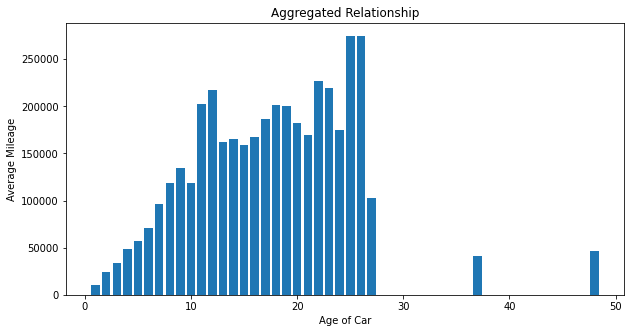

In [104]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Age of Car")
plt.ylabel("Average Mileage")
plt.title("Aggregated Relationship")
plt.bar(x= gdf.age, height = gdf.mileage)

Show the aggregated relationship between age of car and the price. 

<BarContainer object of 30 artists>

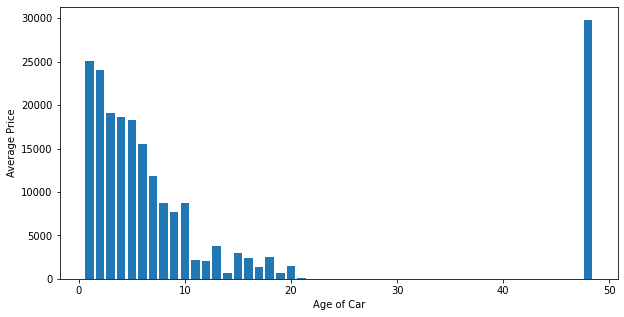

In [105]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Age of Car")
plt.ylabel("Average Price")
plt.bar(x= gdf.age, height = gdf.price)

### Correlation of Age to Mileage

In [107]:
correlation_age = pearsonr(clean_df.age, clean_df.mileage)

In [128]:
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_age[0].round(3)}" + '\033[0m')
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_age[1]}" + '\033[0m', "- Making it statistically significant")

The correlation coefficient of mileage to: 0.595
The correlation coefficient of mileage to: 6.256875353050809e-239 - Making it statistically significant


Visualize the Correlation of Age to Mileage.

<AxesSubplot:xlabel='age', ylabel='mileage'>

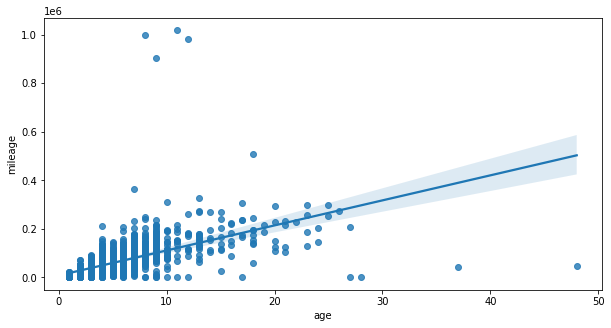

In [129]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
sns.regplot(x = clean_df.age, y = clean_df.mileage)

Moderate Positive Correlation between the mileage of the car and the age. 

### Correlation of Age to Price

In [132]:
correlation_price = pearsonr(clean_df.price, clean_df.age)

In [136]:
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_price[0].round(3)}" + '\033[0m.')
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_price[1]}" + '\033[0m', "-- Making it statistically significant.")

The correlation coefficient of mileage to: -0.418.
The correlation coefficient of mileage to: 2.016976318679714e-106 -- Making it statistically significant.


<AxesSubplot:xlabel='age', ylabel='price'>

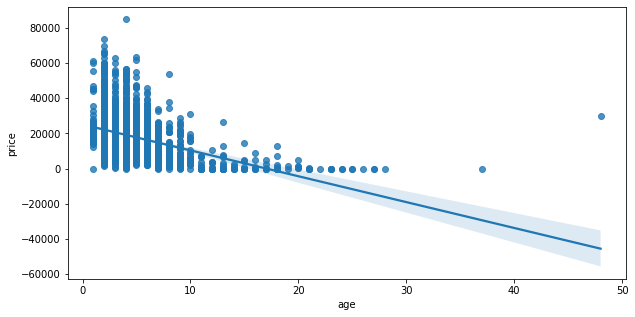

In [139]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
sns.regplot(x = clean_df.age, y = clean_df.price)

### Correlation of Price to Mileage

In [146]:
correlation_mileage= pearsonr(clean_df.mileage, clean_df.price)

In [147]:
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_mileage[0].round(3)}" + '\033[0m.')
print("The correlation coefficient of mileage to:", '\033[1m' + f"{correlation_mileage[1]}" + '\033[0m', "-- Making it statistically significant.")

The correlation coefficient of mileage to: -0.401.
The correlation coefficient of mileage to: 4.25148104609309e-97 -- Making it statistically significant.


<AxesSubplot:xlabel='mileage', ylabel='price'>

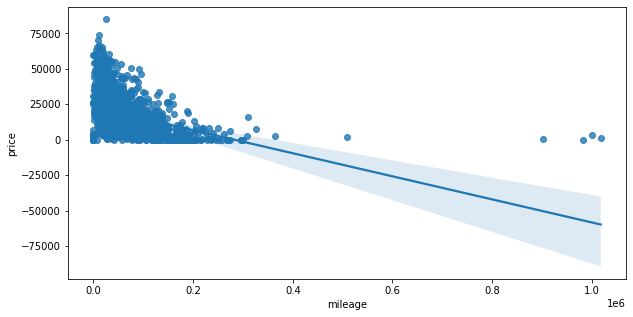

In [148]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
sns.regplot(x = clean_df.mileage, y = clean_df.price)

There is a low negative correlation between mileage and price. This makes sense as the price of a car depends on multiple different independent variables like mileage, age, model etc. 

**Road Map:**
- *TODO* Further Exploration of the Model of cars is needed.
- Determine correlation between mileage and car age 
- Two boxplots one that shows the price of clean vehicles one that shows the price of salvaged vehciles. Possibly resample the number of salvaged vehicles generated in order to make it a statistically significant dataset.
- Split cars up by which continent they were manufactured in (North America, Asia, Europe.). Create new column in dataframe foreign or domestic. 
- **CORRELATION CONT.** Multiple Linear Regression/Correlation to determine Price. Inferential Statistics. 